###### Importing external libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,log_loss, accuracy_score, precision_score, recall_score


#### Data Exploration on Training Set

In [2]:
# Loading the train data
df = pd.read_csv('../Binary Classification/dataset/training_set.csv', index_col=0)
#shape of data
print('Shape of Data:' , df.shape)

# Peek the first 5 rows of data
df.head(5)

Shape of Data: (3910, 58)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [3]:
# Checking Y distribution 
df['Y'].value_counts(normalize=True)

0    0.607673
1    0.392327
Name: Y, dtype: float64

In [4]:
# Checking for null and missing values
df.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [5]:
# Getting insights in data
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


###### Defining exploratory variables and target variables

In [6]:
# Setting up x and Y values
X = df.drop(['Y'], axis=1)
y = df['Y']

In [7]:
# Splitting data into training and validation sets
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [8]:
# Shape of training data
X_train.shape

(3128, 57)

##### Feature Selection using Random Forest Classifier

In [9]:
cls = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
cls.fit(X_train, y_train)
feature_imp = cls.feature_importances_

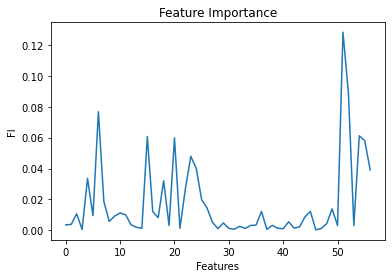

In [10]:
# Visualizing the features based on feature importances
x = [ x for x in range(X_train.shape[1])]
plt.plot(x, feature_imp)
plt.xlabel('Features')
plt.ylabel('FI')
plt.title('Feature Importance')
plt.show()

In [11]:
# Selecting features with greater importance than average
mean_imp = np.mean(feature_imp)
top_imp = len(np.where(feature_imp > mean_imp)[0])
print('Features with greater importance than average:' , top_imp)

Features with greater importance than average: 15


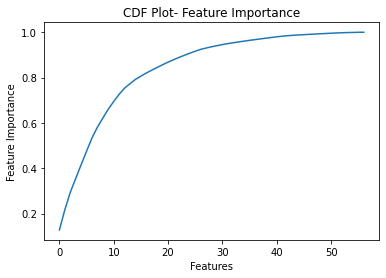

In [12]:
# Cummulative Distribution Function plot for Feature Importance
plt.plot(np.cumsum(sorted(feature_imp, reverse=True)))
plt.title('CDF Plot- Feature Importance')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.show()

###### Ranking features based on feature importances

In [13]:
# Ranking features based on their importances
imp = sorted(zip(X.columns, feature_imp), key=lambda x: x[1], reverse=True)
# Extracting top 30 features based on cdf plot
features = [x[0] for x in imp[:30]]

In [14]:
X_train_final = X_train[features]
X_test_final = X_test[features]

# Shape of X_train_final
print('Shape of new X_train data: ', X_train_final.shape)
print('Shape of new X_test data:' , X_test_final.shape)

Shape of new X_train data:  (3128, 30)
Shape of new X_test data: (782, 30)


###### Normalizing data to achieve numerical stability using Standard Scaler

In [15]:
scaler = StandardScaler()
scaler.fit(X_train_final)

# Transforming the data
X_train_final = pd.DataFrame(scaler.transform(X_train_final), columns=X_train_final.columns)
X_test_final = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns)

### Model Training
1. Logistic Regression
2. Naive-Bayes Classifier
3. Support Vector Machine
4. K-Nearest Neighbor
5. Decision Tree
6. Random Forest Classifier
7. XG Boost Classifier

In [16]:
models = {}

# 1. Logistic Regression
models['Logistic Regression'] = LogisticRegression(C=1, penalty='l2', max_iter=250, random_state=42)

# 2. Naive- Bayes
models['Naive Bayes'] = GaussianNB()

# 3. Support Vector Machine
models['Support Vector Machine'] = LinearSVC(penalty='l2', max_iter=250, random_state=42,tol=1e-5)

# 4. K- Nearest Neighbor
models['K-Nearest Neighbors'] = KNeighborsClassifier()

# 5. Decision Tree
models['Decision Tree'] = DecisionTreeClassifier(criterion='gini', min_samples_split=3, random_state=42)

# 6. Random Forest Classifier
models['Random Forest'] = RandomForestClassifier(n_estimators=500,
                             max_depth=None,
                             min_samples_split=3,
                             n_jobs=1,
                             class_weight='balanced',
                             random_state=42)
# 7. XGBoost Classifier
models['XG Boost'] = XGBClassifier(n_estimators=500,
                    max_depth=5,
                    learning_rate=0.15,
                    colsample_bytree=1,
                    subsample=1,
                    reg_alpha=0.3,
                    gamma=10,
                    n_jobs=2,
                    eval_metric='logloss',
                    use_label_encoder=False)


In [17]:
accuracy,precision, recall = {}, {}, {}

for k in models.keys():
    
    # Fit the classifier model
    models[k].fit(X_train_final, y_train)
    
    # Predictions on classifier models
    predictions = models[k].predict(X_test_final)
    
    
    # Calculating Metrics - Accuracy, Precision, Recall
    accuracy[k] = accuracy_score(predictions,y_test)
    precision[k] = precision_score(predictions,y_test)
    recall[k] = recall_score(predictions, y_test)
    

C:\Users\shagu\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
# Consolidating all the evaluation metrics for all the models
df_models = pd.DataFrame(index=models.keys(), 
                         columns=['Accuracy', 'Precision', 'Recall'])
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()

print(df_models)

                        Accuracy  Precision    Recall
Logistic Regression     0.914322   0.846906  0.928571
Naive Bayes             0.884910   0.934853  0.803922
Support Vector Machine  0.909207   0.846906  0.915493
K-Nearest Neighbors     0.897698   0.843648  0.890034
Decision Tree           0.904092   0.876221  0.879085
Random Forest           0.951407   0.915309  0.959044
XG Boost                0.950128   0.918567  0.952703


Text(0.5, 1.0, 'Training Model Performance')

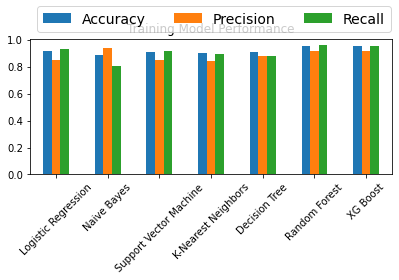

In [19]:
# Visualization of accuracy, precision, recall for all models
ax  = df_models.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()
plt.title('Training Model Performance')


## Conclusion: 

1. Based on the graph, we can easily see that XGBoost has the best performance amongst all the models.
2. However, we will dig deeper and use log-loss and AUC Score as evaluation metrics to see the performance on train and test data. 
3. Based on accuracy, precision, recall score we can see the model performance however it is difficult to determine if the model is overfitting or underfitting the data. 
4. We will have to dive deeper in the log-loss values to check the divergence of probabilities to determine the best performing model. 
